In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
            [1,0,1,0]])
y=np.array([0,1,0,1])

In [3]:
counts={}
for label in np.unique(y):
    print(label)
    counts[label] = X[y==label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

0
1
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                              stratify=cancer.target,
                                              random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print('Accuracy of training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [8]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

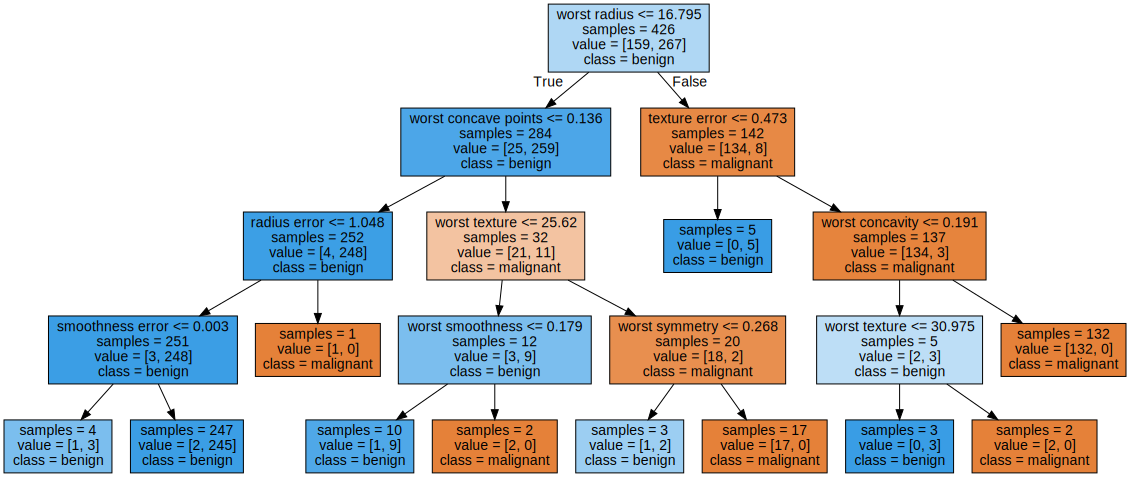

In [9]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)